<center><h1>Singh_Avantika_HW7</h1></center>

Name: Avantika Singh
<br>
Github Username: avantikasingh 
<br>
USC ID: 6318290290

Grace Days Used: 1

Remaining: 1

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from scipy.stats import mode
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, cdist

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
mfcc_df = "../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv"
mfcc_df = pd.read_csv(mfcc_df)
mfcc_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
train_df = mfcc_df.sample(frac = 0.7, random_state = 42)
test_df = mfcc_df.drop(train_df.index)

train_df.reset_index(drop = True, inplace = True)
test_df.reset_index(drop = True, inplace = True)

X_train = train_df.iloc[:, :22]
y_train = train_df.iloc[:, 22:-1]

X_test = test_df.iloc[:, :22]
y_test = test_df.iloc[:, 22:-1]

print(train_df.shape)
print(test_df.shape)

(5036, 26)
(2159, 26)


In [5]:
y_train

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
5031,Hylidae,Hypsiboas,HypsiboasCordobae
5032,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5033,Dendrobatidae,Ameerega,Ameeregatrivittata
5034,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


### (b) Train a classifier for each label

#### (i) Research

Exact Match Ratio (Accuracy):

The exact match ratio measures the percentage of correctly predicted instances where the classifier's output exactly matches the true labels for all classes. Mathematically, it is defined as the ratio of the number of correctly predicted instances to the total number of instances.

Hamming Loss:

Hamming loss is a metric that quantifies the similarity between two sets by calculating the fraction of labels that are incorrectly predicted.
It is computed as the average fraction of incorrect labels over all instances. For a given instance, it sums the number of incorrect labels and divides by the total number of labels.

In [6]:
labels = ['Family', 'Genus', 'Species']
def calc_hamming_loss(y_test, y_pred):
    y_test['family_mismatch'] = np.where(y_test['Family'] != y_pred['Family'], 1, 0)
    y_test['genus_mismatch'] = np.where(y_test['Genus'] != y_pred['Genus'], 1, 0)
    y_test['species_mismatch'] = np.where(y_test['Species'] != y_pred['Species'], 1, 0)
    
    sum_val = 0
    sum_val += y_test["family_mismatch"].sum()
    sum_val += y_test["genus_mismatch"].sum()
    sum_val += y_test["species_mismatch"].sum()
    return (sum_val/(3*len(y_test)))
    
def calc_exact_match(y_test, y_pred):
    df=(y_test['Family']==y_pred['Family'])&(y_test['Genus']==y_pred['Genus'])&(y_test['Species']==y_pred['Species'])
    df.astype(int)
    return (df.sum()/len(y_test))


#### (ii) Train a SVM for each of the labels

In [60]:
pred = pd.DataFrame()
for cat in labels:
    print(f'\n\nFor Category: {cat}')
    # Define the parameter grid
    param_grid = [{
        'C': [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3],
        'kernel': ['rbf'],
        'gamma': np.linspace(0.1, 2, 5).tolist(),
    }]
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(SVC(decision_function_shape='ovr'), param_grid, cv=10)

    # Fit the data to find the best hyperparameters
    grid_search.fit(X_train, y_train[[cat]])

     # Get the best hyperparameters
    best_params = grid_search.best_params_

    pred[cat] = grid_search.predict(X_test)
    y_true = y_test[cat]
    print(f'\tBest parameters = {best_params}')
#     print(classification_report(y_test[[i]].values.ravel(), pred1[i]))
    print(f'\tHamming loss = {hamming_loss(y_test[[cat]].values.ravel(), pred[cat])}')
    print(f'\tExact Match Score = {accuracy_score(y_test[[cat]].values.ravel(), pred[cat])}')



For Category: Family
	Best parameters = {'C': 10.0, 'gamma': 2.0, 'kernel': 'rbf'}
	Hamming loss = 0.007410838351088467
	Exact Match Score = 0.9925891616489115


For Category: Genus
	Best parameters = {'C': 10.0, 'gamma': 2.0, 'kernel': 'rbf'}
	Hamming loss = 0.008800370541917554
	Exact Match Score = 0.9911996294580825


For Category: Species
	Best parameters = {'C': 10.0, 'gamma': 1.525, 'kernel': 'rbf'}
	Hamming loss = 0.010653080129689671
	Exact Match Score = 0.9893469198703103


In [62]:
y_pred = pd.concat([pd.Series(pred['Family']), pd.Series(pred['Genus']), pd.Series(pred['Species'])], axis=1, sort=False)
#print(y_test)
#y_pred.rename(columns={0: "Family", 1: "Genus", 2: "Species"}, errors="raise", inplace = True)
print(f'Hamming Loss: {calc_hamming_loss(y_test, y_pred)}')
print(f'Exact Match Score: {calc_exact_match(y_test, y_pred)}')

Hamming Loss: 0.00895476300756523
Exact Match Score: 0.9884205650764243


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [64]:
svm_l1 = make_pipeline(StandardScaler(), LinearSVC(random_state=42, max_iter = 10000, penalty = 'l1', dual = False))

pred = pd.DataFrame()
for cat in labels:
    print(f'\n\nFor Category: {cat}')

    # Define the parameter grid
    param_grid = [{
        'linearsvc__C': [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
    }]
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator = svm_l1, param_grid = param_grid, cv = 10)

    # Fit the data to find the best hyperparameters
    grid_search.fit(X_train, y_train[[cat]])

     # Get the best hyperparameters
    best_params = grid_search.best_params_

    pred[cat] = grid_search.predict(X_test)
    y_true = y_test[cat]
    print(f'\tBest parameters = {best_params}')
#     print(classification_report(y_test[[i]].values.ravel(), pred1[i]))
    print(f'\tHamming loss = {hamming_loss(y_test[[cat]].values.ravel(), pred[cat])}')
    print(f'\tExact Match Score = {accuracy_score(y_test[[cat]].values.ravel(), pred[cat])}')



For Category: Family
	Best parameters = {'linearsvc__C': 1}
	Hamming loss = 0.058823529411764705
	Exact Match Score = 0.9411764705882353


For Category: Genus
	Best parameters = {'linearsvc__C': 10.0}
	Hamming loss = 0.04307549791570171
	Exact Match Score = 0.9569245020842982


For Category: Species
	Best parameters = {'linearsvc__C': 10.0}
	Hamming loss = 0.04307549791570171
	Exact Match Score = 0.9569245020842982


In [65]:
y_pred = pd.concat([pd.Series(pred['Family']), pd.Series(pred['Genus']), pd.Series(pred['Species'])], axis=1, sort=False)
#print(y_test)
#y_pred.rename(columns={0: "Family", 1: "Genus", 2: "Species"}, errors="raise", inplace = True)
print(f'Hamming Loss: {calc_hamming_loss(y_test, y_pred)}')
print(f'Exact Match Score: {calc_exact_match(y_test, y_pred)}')

Hamming Loss: 0.04832484174772271
Exact Match Score: 0.9175544233441408


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [7]:
svm_l1_smote = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                              ['standardize', StandardScaler()],
                              ['classifier', 
                               LinearSVC(random_state=42, max_iter = 10000, penalty = 'l1', dual = False)]])

pred = pd.DataFrame()
for cat in labels:
    print(f'\n\nFor Category: {cat}')

    # Define the parameter grid
    param_grid = [{
        'classifier__C': [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3]
    }]
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator = svm_l1_smote, param_grid = param_grid, cv = 10)

    # Fit the data to find the best hyperparameters
    grid_search.fit(X_train, y_train[[cat]])

     # Get the best hyperparameters
    best_params = grid_search.best_params_

    pred[cat] = grid_search.predict(X_test)
    y_true = y_test[cat]
    print(f'\tBest parameters = {best_params}')
#     print(classification_report(y_test[[i]].values.ravel(), pred1[i]))
    print(f'\tHamming loss = {hamming_loss(y_test[[cat]].values.ravel(), pred[cat])}')
    print(f'\tExact Match Score = {accuracy_score(y_test[[cat]].values.ravel(), pred[cat])}')




For Category: Family
	Best parameters = {'classifier__C': 100.0}
	Hamming loss = 0.0745715609078277
	Exact Match Score = 0.9254284390921723


For Category: Genus
	Best parameters = {'classifier__C': 10.0}
	Hamming loss = 0.07596109309865678
	Exact Match Score = 0.9240389069013432


For Category: Species
	Best parameters = {'classifier__C': 100.0}
	Hamming loss = 0.042612320518758684
	Exact Match Score = 0.9573876794812413


In [8]:
y_pred = pd.concat([pd.Series(pred['Family']), pd.Series(pred['Genus']), pd.Series(pred['Species'])], axis=1, sort=False)
#print(y_test)
#y_pred.rename(columns={0: "Family", 1: "Genus", 2: "Species"}, errors="raise", inplace = True)
print(f'Hamming Loss: {calc_hamming_loss(y_test, y_pred)}')
print(f'Exact Match Score: {calc_exact_match(y_test, y_pred)}')

Hamming Loss: 0.06438165817508106
Exact Match Score: 0.8754052802223251


##### Summary:
    Hamming loss for Gaussian kernel SVM =  0.008

    Hamming loss for L1 penalized =  0.048

    Hamming loss with smote =  0.064



    Exact Match Score for Gaussian kernal SVM= 0.988

    Exact Match Score for L1 penalized =  0.917

    Exact Match Score with smote =  0.875


Gaussian kerval SVM has the best hamming score but the lowest exact match score since exact match score compares all the labels to consider a prediction correct.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [3]:
train_df = mfcc_df.iloc[:, :-4]
test_df = mfcc_df.iloc[:, -4:-1]

hamming_dist_list = []
hamming_loss_list = []
num_iterations = 50
for i in range(num_iterations):
    # Find optimal k
    best_k, max_score = 2, 0
    for n in range(2, num_iterations+1):
        kmeans = KMeans(n_clusters=n, random_state=i)
        cluster_labels = kmeans.fit_predict(train_df)
        silhouette_avg = silhouette_score(train_df, cluster_labels)
        if silhouette_avg > max_score:
            best_k = n
            max_score = silhouette_avg
    print(f"\nOptimal K: {best_k}")
    kmeans = KMeans(n_clusters=best_k, random_state=i)
    cluster_labels = kmeans.fit_predict(train_df)

    # Get Majority Labels
    cluster_major = pd.DataFrame(columns=test_df.columns)
    for j in range(best_k):
        idx, = np.where(cluster_labels == j)
        cluster_samples = test_df.iloc[idx, :]
        row = []
        for label in test_df.columns:
            cur_major = cluster_samples.loc[:, label].value_counts().index[0]
            row.append(cur_major)
        cluster_major.loc[j] = row

    # Calculate Hamming Distance
    misclassified_labels = 0
    for c in range(len(cluster_major)):
        idx, = np.where(cluster_labels == c)
        for label in test_df.loc[idx].values:
            missed_labels = (label != cluster_major.loc[c].values)
            misclassified_labels += np.sum(missed_labels)
    hamming_dist = misclassified_labels / test_df.shape[0]
    hamming_loss = misclassified_labels / (test_df.shape[0] * test_df.shape[1])

    hamming_dist_list.append(hamming_dist)
    hamming_loss_list.append(hamming_loss)
    print(f"Iteration {i + 1} | Hamming Distance: {hamming_dist}, Hamming Loss: {hamming_loss}, \nMajority Label: \n{cluster_major}")



Optimal K: 4
Iteration 1 | Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, 
Majority Label: 
            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2    Dendrobatidae   Ameerega      Ameeregatrivittata
3          Hylidae  Hypsiboas    HypsiboasCinerascens

Optimal K: 4
Iteration 2 | Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, 
Majority Label: 
            Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2    Dendrobatidae   Ameerega      Ameeregatrivittata
3          Hylidae  Hypsiboas    HypsiboasCinerascens

Optimal K: 4
Iteration 3 | Hamming Distance: 0.735371785962474, Hamming Loss: 0.24512392865415797, 
Majority Label: 
            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1 

##### Summary

In [4]:
print(f'Average Hamming Distance: {np.mean(hamming_dist_list)}')
print(f'Standard Deviation Hamming Distance: {np.std(hamming_dist_list)}')
print(f'Average Hamming Loss: {np.mean(hamming_loss_list)}')
print(f'Standard Deviation Hamming Loss: {np.std(hamming_loss_list)}')
print(f'Average Hamming Score: {1-np.mean(hamming_loss_list)}')
print(f'Standard Deviation Hamming Score: {np.std(hamming_loss_list)}')


Average Hamming Distance: 0.6718888116747741
Standard Deviation Hamming Distance: 0.016807250926384132
Average Hamming Loss: 0.22396293722492472
Standard Deviation Hamming Loss: 0.005602416975461369
Average Hamming Score: 0.7760370627750752
Standard Deviation Hamming Score: 0.005602416975461369


## 3. ISLR 12.6.2

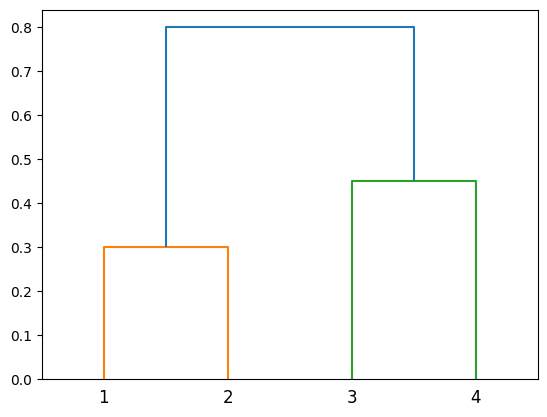

In [7]:
distance_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7], 
    [0.3, 0.0, 0.5, 0.8], 
    [0.4, 0.5, 0.0, 0.45], 
    [0.7, 0.8, 0.45, 0.0]
])
distances = squareform(distance_matrix)
link_mat = linkage(distances, "complete")
dendrogram(link_mat, labels=["1", "2", "3", "4"])
plt.show()

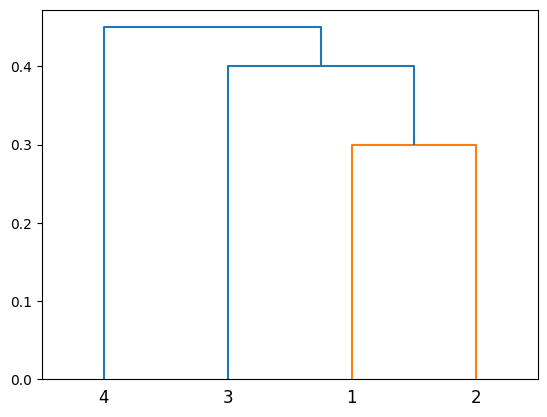

In [8]:
link_mat = linkage(distances, "single")
dendrogram(link_mat, labels=["1", "2", "3", "4"])
plt.show()

iii) Observation 1,2 belong to cluster A.

Observation 3,4 belong to cluster B.

iv) Observation 1,2,3 belong to cluster A.

Observation 4 belongs to cluster B.

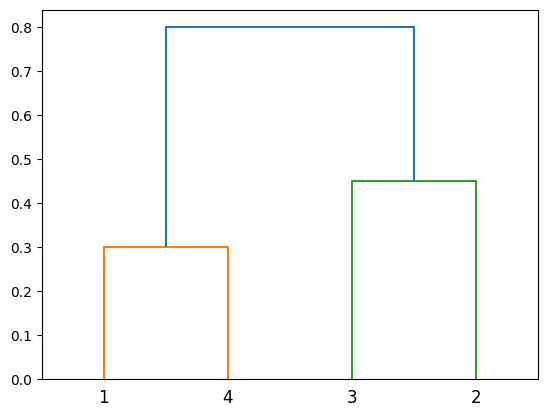

In [9]:
distances = squareform(distance_matrix)
link_mat = linkage(distances, "complete")
dendrogram(link_mat, labels=["1", "4", "3", "2"])
plt.show()